# Area Law

We can re-use the Hamiltonian-construction algorithm for the 2D case. By labeling the sites as:  
 $$1\,\,2\,\,\,3\,\,\,\,4\,\,\,\,5\,\,\,\,6\\
   7\,\,8\,\,9\,\,10\,11\,12$$
and adding the right interaction terms in the J-matrices, a multi dimensional model can be emulated.

In [36]:
using LinearAlgebra, SparseArrays, DelimitedFiles, Arpack, Plots

#Including the functions to construct a Hamiltonian and calculate the entanglement entropy
include("functions.jl") #MakeHam, RedDens, EntEntr, PopMul, BinDec

1st calculate the Hamilton-Matrix:

In [37]:
#  "H= + \sum JSS"    ==>    J>0: antiferromagn.,   J<0: ferromagn.
N=12

#Ising model
#matrix=Ising_2D(N,1)

#Heisenberg
matrix=Heisenberg_2D(N,1,0)

4096×4096 Array{Float64,2}:
 16.0   0.0   0.0   0.0   0.0  0.0  0.0  …  0.0   0.0   0.0   0.0   0.0   0.0
  0.0  12.0   0.5   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.5  10.0   0.0   0.5  0.0  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  10.0   0.0  0.5  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.5   0.0  10.0  0.0  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.5   0.0  6.0  0.5  …  0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  0.5  8.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.5  0.0  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  0.5  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  0.0  0.5  …  0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  0.0  

Find the groundstate:

In [38]:
a=eigen(matrix);

In [41]:
gs=a.vectors[:,1]
minimum(a.values)

-16.614936573620646

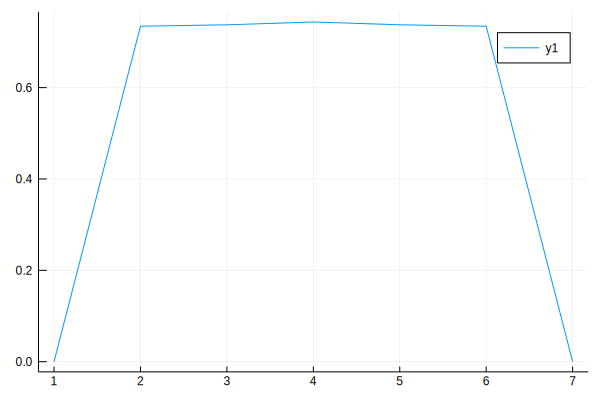

In [45]:
data = Array{Float32}(undef, Int((N/2)+1))
for i in 0:(Int(N/2))
    subs=Array{Int32}(undef, (i*2))
    for j in 1:i
        subs[j]=j
        subs[j+i]=j+Int(N/2)
    end
    data[i+1] = EntEntr(gs,subs)
end
plot(data)

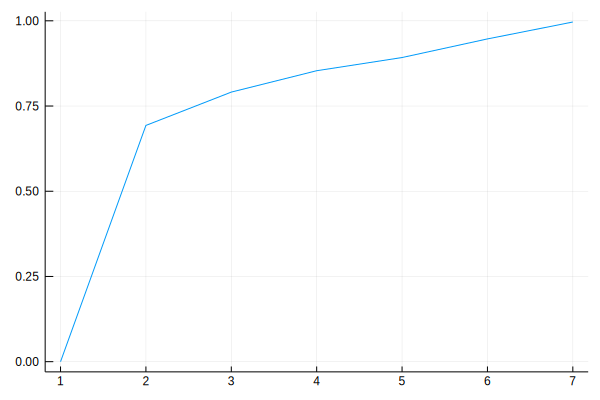

In [46]:
data = Array{Float32}(undef, Int((N/2)+1))
for i in 0:(Int(N/2))
    subs=Array{Int32}(undef, i)
    for j in 1:i
        subs[j]=j
    end
    data[i+1] = EntEntr(gs,subs)
end
plot(data, label="")